In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('position_salaries_dataset.csv')
print(dataset.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [7]:
print('Slope: ', lin_reg.coef_)
print('Intercept: ', lin_reg.intercept_)

Slope:  [80878.78787879]
Intercept:  -195333.3333333332


In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
ploy_reg = PolynomialFeatures(degree=2)
x_poly = ploy_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

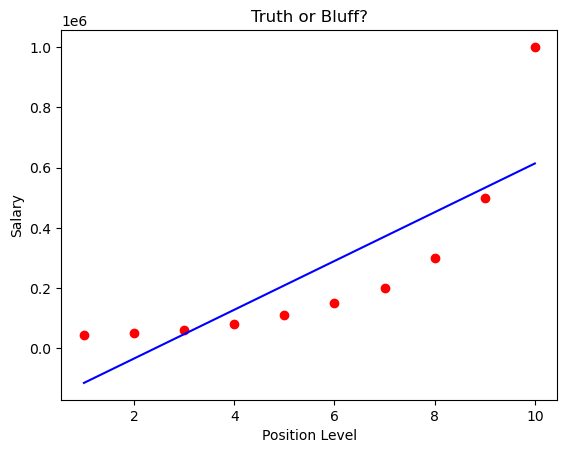

In [10]:
plt.scatter(x,y, color='red')
plt.plot(x,lin_reg.predict(x), color='blue')
plt.title('Truth or Bluff?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

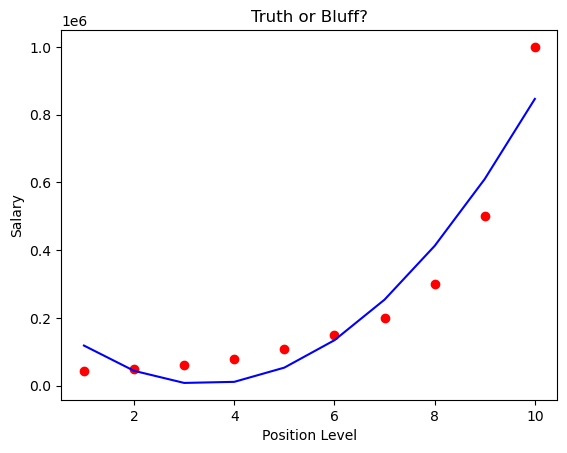

In [11]:
plt.scatter(x,y, color='red')
plt.plot(x,lin_reg2.predict(x_poly), color='blue')
plt.title('Truth or Bluff?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Good Fit

In [12]:
ploy_reg = PolynomialFeatures(degree=3)
x_poly = ploy_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

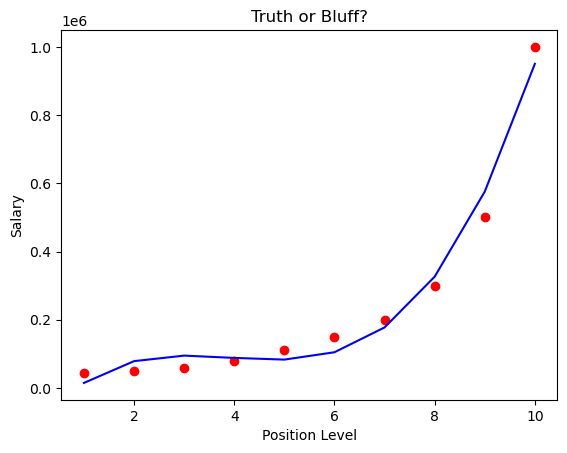

In [13]:
plt.scatter(x,y, color='red')
plt.plot(x,lin_reg2.predict(x_poly), color='blue')
plt.title('Truth or Bluff?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Overfit

In [14]:
ploy_reg = PolynomialFeatures(degree=4)
x_poly = ploy_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

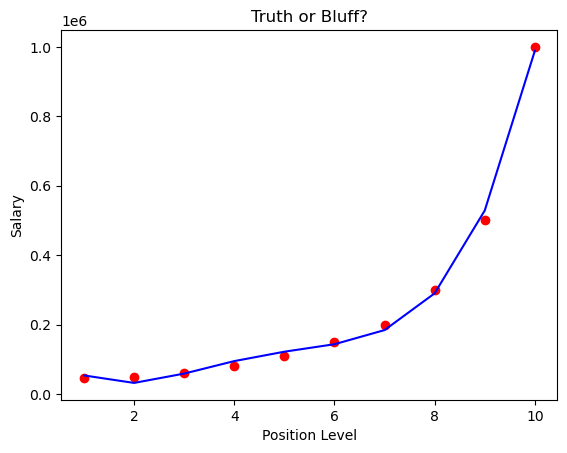

In [15]:
plt.scatter(x,y, color='red')
plt.plot(x,lin_reg2.predict(x_poly), color='blue')
plt.title('Truth or Bluff?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [16]:
ressiduals = abs(y)-abs(lin_reg.predict(x))
ss = ressiduals**2
ss = ss.sum()

In [17]:
import math

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
rmse = math.sqrt(ss)
print('RMSE: ', rmse)

RMSE:  489532.2442718336


In [24]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(ressiduals)
print('Durbin-Watson: ',dw)

Durbin-Watson:  0.8618136326352376


In [29]:
residuals = abs(y)-abs(lin_reg2.predict(ploy_reg.fit_transform(x)))
ss = ressiduals**2
ss = ss.sum()

In [30]:
rmse = math.sqrt(ss)
print('RMSE: ', rmse)

RMSE:  45863.25575488709


In [31]:
dw = durbin_watson(residuals)
print('Durbin-Watson: ',dw)

Durbin-Watson:  2.281437775413533
